In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
books = pd.read_csv('/content/drive/MyDrive/D_M(dataset)/books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/D_M(dataset)/ratings.csv')
book_tags = pd.read_csv('/content/drive/MyDrive/D_M(dataset)/book_tags.csv')
tags = pd.read_csv('/content/drive/MyDrive/D_M(dataset)/tags.csv')

In [4]:
books['original_publication_year'] = books['original_publication_year'].fillna(-1).apply(lambda x: int(x) if x != -1 else -1)

In [5]:
ratings_rmv_duplicates = ratings.drop_duplicates()
unwanted_users = ratings_rmv_duplicates.groupby('user_id')['user_id'].count()
unwanted_users = unwanted_users[unwanted_users < 3]
unwanted_ratings = ratings_rmv_duplicates[ratings_rmv_duplicates.user_id.isin(unwanted_users.index)]
new_ratings = ratings_rmv_duplicates.drop(unwanted_ratings.index)

In [6]:
new_ratings['title'] = books.set_index('id').title.loc[new_ratings.book_id].values

In [7]:
new_ratings.head(10)

,book_id,user_id,rating,title
0,1,314,5,"The Hunger Games (The Hunger Games, #1)"
1,1,439,3,"The Hunger Games (The Hunger Games, #1)"
2,1,588,5,"The Hunger Games (The Hunger Games, #1)"
3,1,1169,4,"The Hunger Games (The Hunger Games, #1)"
4,1,1185,4,"The Hunger Games (The Hunger Games, #1)"
5,1,2077,4,"The Hunger Games (The Hunger Games, #1)"
6,1,2487,4,"The Hunger Games (The Hunger Games, #1)"
7,1,2900,5,"The Hunger Games (The Hunger Games, #1)"
8,1,3662,4,"The Hunger Games (The Hunger Games, #1)"
9,1,3922,5,"The Hunger Games (The Hunger Games, #1)"


In [8]:
v = books['ratings_count']
m = books['ratings_count'].quantile(0.95)
R = books['average_rating']
C = books['average_rating'].mean()
W = (R*v + C*m) / (v + m)

In [9]:
books['weighted_rating'] = W

In [10]:
qualified  = books.sort_values('weighted_rating', ascending=False).head(250)

In [11]:
qualified[['title', 'authors', 'average_rating', 'weighted_rating']].head(15)

,title,authors,average_rating,weighted_rating
24,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré",4.61,4.555956
26,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",4.54,4.490428
17,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck",4.53,4.485090
23,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré",4.53,4.483227
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44,4.424365
20,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",4.46,4.419054
30,The Help,Kathryn Stockett,4.45,4.405158
38,"A Game of Thrones (A Song of Ice and Fire, #1)",George R.R. Martin,4.45,4.398759
134,"A Storm of Swords (A Song of Ice and Fire, #3)",George R.R. Martin,4.54,4.396645
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.74,4.391147


In [12]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [13]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [14]:
genres = ["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics",
          "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction",
          "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror",
          "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal",
          "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction",
          "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]

In [15]:
genres = list(map(str.lower, genres))
genres[:4]

['art', 'biography', 'business', 'chick lit']

In [16]:
available_genres = tags.loc[tags.tag_name.str.lower().isin(genres)]

In [17]:
available_genres.head()

,tag_id,tag_name
2938,2938,art
4605,4605,biography
5951,5951,business
7077,7077,christian
7457,7457,classics


In [18]:
available_genres_books = book_tags[book_tags.tag_id.isin(available_genres.tag_id)]

In [19]:
print('There are {} books that are tagged with above genres'.format(available_genres_books.shape[0]))

There are 60573 books that are tagged with above genres


In [20]:
available_genres_books.head()

,goodreads_book_id,tag_id,count
1,1,11305,37174
5,1,11743,9954
25,1,7457,958
38,1,22973,673
52,1,20939,465


In [21]:
available_genres_books['genre'] = available_genres.tag_name.loc[available_genres_books.tag_id].values
available_genres_books.head()

,goodreads_book_id,tag_id,count,genre
1,1,11305,37174,fantasy
5,1,11743,9954,fiction
25,1,7457,958,classics
38,1,22973,673,paranormal
52,1,20939,465,mystery


In [22]:
def build_chart(genre, percentile=0.85):
    df = available_genres_books[available_genres_books['genre'] == genre.lower()]
    qualified = books.set_index('book_id').loc[df.goodreads_book_id]

    v = qualified['ratings_count']
    m = qualified['ratings_count'].quantile(percentile)
    R = qualified['average_rating']
    C = qualified['average_rating'].mean()
    qualified['weighted_rating'] = (R*v + C*m) / (v + m)

    qualified.sort_values('weighted_rating', ascending=False, inplace=True)
    return qualified

In [23]:
cols = ['title','authors','original_publication_year','average_rating','ratings_count','work_text_reviews_count','weighted_rating']

In [24]:
genre = 'Travel'
build_chart(genre)[cols].head(15)

,title,authors,original_publication_year,average_rating,ratings_count,work_text_reviews_count,weighted_rating
book_id,,,,,,,
191139,"Oh, The Places You'll Go!",Dr. Seuss,1990,4.34,257260,4021,4.260416
10987,"Voyager (Outlander, #3)",Diana Gabaldon,1993,4.38,157395,8381,4.252916
10965,"A Breath of Snow and Ashes (Outlander, #6)",Diana Gabaldon,2005,4.43,87098,4053,4.222379
47989,"Night Watch (Discworld, #29; City Watch, #6)",Terry Pratchett,2002,4.47,71271,1670,4.219134
10988,"Drums of Autumn (Outlander, #4)",Diana Gabaldon,1996,4.34,123736,5743,4.203462
6289283,"Born to Run: A Hidden Tribe, Superathletes, an...",Christopher McDougall,2009,4.27,109642,11605,4.147809
16081272,"The Edge of Never (The Edge of Never, #1)",J.A. Redmerski,2012,4.26,117508,10763,4.146623
33600,Shantaram,Gregory David Roberts,2003,4.26,95213,10295,4.130630
21,A Short History of Nearly Everything,Bill Bryson,2003,4.19,191535,9065,4.126910


In [25]:
list(enumerate(available_genres.tag_name))

[(0, 'art'),
 (1, 'biography'),
 (2, 'business'),
 (3, 'christian'),
 (4, 'classics'),
 (5, 'comics'),
 (6, 'contemporary'),
 (7, 'cookbooks'),
 (8, 'crime'),
 (9, 'ebooks'),
 (10, 'fantasy'),
 (11, 'fiction'),
 (12, 'history'),
 (13, 'horror'),
 (14, 'manga'),
 (15, 'memoir'),
 (16, 'music'),
 (17, 'mystery'),
 (18, 'nonfiction'),
 (19, 'paranormal'),
 (20, 'philosophy'),
 (21, 'poetry'),
 (22, 'psychology'),
 (23, 'religion'),
 (24, 'romance'),
 (25, 'science'),
 (26, 'spirituality'),
 (27, 'sports'),
 (28, 'suspense'),
 (29, 'thriller'),
 (30, 'travel')]

In [26]:
idx = 24  # romance
build_chart(list(available_genres.tag_name)[idx])[cols].head(15)

,title,authors,original_publication_year,average_rating,ratings_count,work_text_reviews_count,weighted_rating
book_id,,,,,,,
136251,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré",2007,4.61,1746574,51942,4.586504
862041,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,1998,4.74,190050,6508,4.540846
1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",2005,4.54,1678823,27520,4.518389
62291,"A Storm of Swords (A Song of Ice and Fire, #3)",George R.R. Martin,2000,4.54,469022,19497,4.469871
186074,The Name of the Wind (The Kingkiller Chronicle...,Patrick Rothfuss,2007,4.55,400101,28631,4.468099
1215032,"The Wise Man's Fear (The Kingkiller Chronicle,...",Patrick Rothfuss,2011,4.57,245686,15503,4.443591
2,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",2003,4.46,1735368,28685,4.442161
13496,"A Game of Thrones (A Song of Ice and Fire, #1)",George R.R. Martin,1996,4.45,1319204,46205,4.427319
4502507,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,2009,4.50,397500,17693,4.425116


# ***Content Based Filtering ***

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [28]:
books['authors'] = books['authors'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x.split(', ')])

In [29]:
def get_genres(x):
    t = book_tags[book_tags.goodreads_book_id==x]
    return [i.lower().replace(" ", "") for i in tags.tag_name.loc[t.tag_id].values]

In [30]:
books['genres'] = books.book_id.apply(get_genres)

In [31]:
books['soup'] = books.apply(lambda x: ' '.join([x['title']] + x['authors'] + x['genres']), axis=1)

In [32]:
books['soup'] = books.apply(lambda x: ' '.join([x['title']] + x['authors'] + x['genres']), axis=1)

In [33]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(books['soup'])

# **COSINE SIMILARITY**

In [34]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [35]:
indices = pd.Series(books.index, index=books['title'])
titles = books['title']

In [36]:
def get_recommendations(title, n=10):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    book_indices = [i[0] for i in sim_scores]
    return list(titles.iloc[book_indices].values)[:n]

In [37]:
get_recommendations("Stones from the River")

['Midwives',
 'A Map of the World',
 'The Guernsey Literary and Potato Peel Pie Society',
 'The Book of Ruth',
 'While I Was Gone',
 'Five Quarters of the Orange',
 "She's Come Undone",
 "Sarah's Key",
 'Those Who Save Us',
 'Icy Sparks']

# **For Partial title**

In [38]:
def get_name_from_partial(title):
    return list(books.title[books.title.str.lower().str.contains(title) == True].values)

In [39]:
title = "death"
l = get_name_from_partial(title)
list(enumerate(l))

[(0, 'Harry Potter and the Deathly Hallows (Harry Potter, #7)'),
 (1, 'The Death Cure (Maze Runner, #3)'),
 (2, 'Death Note, Vol. 1: Boredom (Death Note, #1)'),
 (3, 'Death of a Salesman'),
 (4, 'Mort (Death, #1; Discworld, #4)'),
 (5, 'Naked in Death (In Death, #1)'),
 (6, '90 Minutes in Heaven: A True Story of Death and Life'),
 (7, 'Death Masks (The Dresden Files, #5)'),
 (8, 'Chronicle of a Death Foretold'),
 (9,
  'Behind the Beautiful Forevers: Life, Death, and Hope in a Mumbai Undercity'),
 (10, 'Death Comes to Pemberley'),
 (11, 'Death on the Nile (Hercule Poirot, #17)'),
 (12, 'The Death and Life of Charlie St. Cloud'),
 (13, 'Reaper Man (Discworld, #11; Death, #2)'),
 (14, 'The Death of Ivan Ilych'),
 (15, 'Hogfather (Discworld, #20; Death, #4)'),
 (16, 'Inkdeath (Inkworld, #3)'),
 (17, 'Soul Music (Discworld, #16; Death, #3)'),
 (18, 'Thief of Time (Discworld, #26; Death, #5)'),
 (19, 'The Merchant of Death (Pendragon, #1)'),
 (20, 'Death: The High Cost of Living Collected')

In [40]:
get_recommendations(l[1])

['The Scorch Trials (Maze Runner, #2)',
 'The Maze Runner (Maze Runner, #1)',
 'The Kill Order (Maze Runner, #0.5)',
 'Allegiant (Divergent, #3)',
 'The Ask and the Answer (Chaos Walking, #2)',
 'Legend (Legend, #1)',
 'Monsters of Men (Chaos Walking, #3)',
 'Insurgent (Divergent, #2)',
 'Prized (Birthmarked, #2)',
 'Under the Never Sky (Under the Never Sky, #1)']

# **Popularity and ratings**

In [41]:
def improved_recommendations(title, n=10):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    book_indices = [i[0] for i in sim_scores]
    df = books.iloc[book_indices][['title', 'ratings_count', 'average_rating', 'weighted_rating']]

    v = df['ratings_count']
    m = df['ratings_count'].quantile(0.60)
    R = df['average_rating']
    C = df['average_rating'].mean()
    df['weighted_rating'] = (R*v + C*m) / (v + m)

    qualified = df[df['ratings_count'] >= m]
    qualified = qualified.sort_values('weighted_rating', ascending=False)
    return qualified.head(n)

In [42]:
improved_recommendations("Stones from the River")

,title,ratings_count,average_rating,weighted_rating
290,Cutting for Stone,258319,4.28,4.191233
303,I Know This Much Is True,246917,4.17,4.102599
230,Sarah's Key,312444,4.14,4.089670
194,The Guernsey Literary and Potato Peel Pie Society,393626,4.12,4.081519
272,Snow Flower and the Secret Fan,280475,4.05,4.013260
1215,Moloka'i,75307,4.15,4.013210
99,The Poisonwood Bible,546502,4.02,4.002536
395,Hotel on the Corner of Bitter and Sweet,197294,3.98,3.950379
624,Midwives,133155,3.97,3.934547
305,She's Come Undone,259576,3.84,3.846010


In [43]:
improved_recommendations(l[1])

,title,ratings_count,average_rating,weighted_rating
11,"Divergent (Divergent, #1)",1903563,4.24,4.229019
1001,"Champion (Legend, #3)",114623,4.37,4.206581
326,"Legend (Legend, #1)",299998,4.19,4.146832
68,"Insurgent (Divergent, #2)",836362,4.07,4.064089
1044,"Four: A Divergent Story Collection (Divergent,...",97058,4.10,4.056566
90,"The Maze Runner (Maze Runner, #1)",719925,4.02,4.019171
631,"Shatter Me (Shatter Me, #1)",176433,4.01,4.011063
258,"The Scorch Trials (Maze Runner, #2)",305643,3.93,3.949958
684,"Gone (Gone, #1)",144606,3.85,3.915346
1117,"Requiem (Delirium, #3)",100593,3.74,3.873852


# **Collaborative filtering**

**Item** **based**

In [44]:
# bookmat = new_ratings.groupby(['user_id', 'title'])['rating'].mean().unstack()
bookmat = new_ratings.pivot_table(index='user_id', columns='title', values='rating')
bookmat.head()

title,"Angels (Walsh Family, #3)","""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",#GIRLBOSS,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",1/4 جرام,"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets,...,محال,مخطوطة بن إسحاق: مدينة الموتى,نادي السيارات,هشت کتاب,هيبتا,واحة الغروب,يوتوبيا,ڤيرتيجو,キスよりも早く1 [Kisu Yorimo Hayaku 1] (Faster than a Kiss #1),美少女戦士セーラームーン新装版 1 [Bishōjo Senshi Sailor Moon Shinsōban 1]
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
def get_similar(title, mat):
    title_user_ratings = mat[title]
    similar_to_title = mat.corrwith(title_user_ratings)
    corr_title = pd.DataFrame(similar_to_title, columns=['correlation'])
    corr_title.dropna(inplace=True)
    corr_title.sort_values('correlation', ascending=False, inplace=True)
    return corr_title

In [46]:
title = "Twilight (Twilight, #1)"
smlr = get_similar(title, bookmat)

In [47]:
smlr.head(10)

,correlation
title,
god is Not Great: How Religion Poisons Everything,1.0
The Day of the Triffids,1.0
Skipping Christmas,1.0
"Splintered (Splintered, #1)",1.0
Better Homes and Gardens New Cook Book,1.0
"Stolen Songbird (The Malediction Trilogy, #1)",1.0
"Bared to You (Crossfire, #1)",1.0
The Autobiography of Malcolm X,1.0
Balzac and the Little Chinese Seamstress,1.0


In [48]:
smlr = smlr.join(books.set_index('title')['ratings_count'])
smlr.head()

,correlation,ratings_count
title,,
'Salem's Lot,0.275938,228680
'Salem's Lot,0.275938,72797
11/22/63,0.431331,258464
"13 Little Blue Envelopes (Little Blue Envelope, #1)",-0.500000,66950
1776,0.301511,130293


In [49]:
smlr[smlr.ratings_count > 5e5].sort_values('correlation', ascending=False).head(10)

,correlation,ratings_count
title,,
"Twilight (Twilight, #1)",1.000000,3866839
"New Moon (Twilight, #2)",0.885400,1149630
"The Selection (The Selection, #1)",0.866025,505340
"Eclipse (Twilight, #3)",0.857845,1134511
"Me Before You (Me Before You, #1)",0.771845,587647
"Matched (Matched, #1)",0.707029,511815
"Breaking Dawn (Twilight, #4)",0.689029,1070245
Bossypants,0.669954,506250
"City of Bones (The Mortal Instruments, #1)",0.654081,1154031


**User** **based**

In [50]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162993 sha256=5ac728c35802403ac4e1f0d89b0062043e9a2286b5ac613dde9c39903d47fea0
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [51]:
  from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [52]:
reader = Reader()
data = Dataset.load_from_df(new_ratings[['user_id', 'book_id', 'rating']], reader)

In [53]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])

{'test_rmse': array([0.84226672, 0.84162144, 0.84064957, 0.8436639 , 0.84236482]),
 'test_mae': array([0.65812102, 0.65818796, 0.65662261, 0.66039808, 0.658598  ]),
 'fit_time': (17.81170129776001,
  10.896455526351929,
  11.224339485168457,
  10.957856178283691,
  11.061370134353638),
 'test_time': (3.437274694442749,
  1.5072638988494873,
  1.7199890613555908,
  1.396925687789917,
  1.683863639831543)}

In [54]:
trainset = data.build_full_trainset()
svd.fit(trainset);

In [55]:
new_ratings[new_ratings['user_id'] == 10]

,book_id,user_id,rating,title
150478,1506,10,4,The Zahir
282986,2833,10,4,The Prisoner of Heaven (The Cemetery of Forgot...
340448,3409,10,5,The Winner Stands Alone
393966,3946,10,5,Matterhorn
452158,4531,10,4,The Joke
506878,5084,10,2,The Sheltering Sky
588312,5907,10,4,Our Mutual Friend
590191,5926,10,2,The Night Watch
610487,6131,10,2,The Longest Day
696035,7002,10,5,A Mercy


In [56]:
svd.predict(10, 1056)

Prediction(uid=10, iid=1056, r_ui=None, est=3.8492799954084074, details={'was_impossible': False})

# **HYBRID** **RECOMMENDATION**

In [57]:
def hybrid(user_id, title, n=10):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:51]
    book_indices = [i[0] for i in sim_scores]

    df = books.iloc[book_indices][['book_id', 'title', 'original_publication_year', 'ratings_count', 'average_rating']]
    df['est'] = df['book_id'].apply(lambda x: svd.predict(user_id, x).est)
    df = df.sort_values('est', ascending=False)
    return df.head(n)

In [58]:
hybrid(5, "Stones from the River")

,book_id,title,original_publication_year,ratings_count,average_rating,est
3283,5181,Jewel,1991,31851,3.64,4.322977
3467,5180,The Rapture of Canaan,1995,30267,3.80,4.223751
1566,5205,A Map of the World,1992,61347,3.78,4.217574
2602,5159,Here on Earth,1997,38954,3.68,4.199170
1674,5187,The Book of Ruth,1988,56842,3.82,4.158250
1316,5171,Drowning Ruth,2000,67768,3.73,4.125730
1144,5204,We Were the Mulvaneys,1996,77251,3.70,4.083912
3786,5182,Songs in Ordinary Time,1995,27034,3.68,4.081870
5736,5179,Mother of Pearl,1999,17378,3.67,4.064934
4121,17834834,Once We Were Brothers,2010,13856,4.28,3.974412


In [59]:
hybrid(10, "The Time Traveler's Wife")

,book_id,title,original_publication_year,ratings_count,average_rating,est
166,4407,"American Gods (American Gods, #1)",2001,378019,4.11,4.288311
406,5826,Bel Canto,2001,192330,3.92,4.227183
1073,4982,The Sirens of Titan,1959,72493,4.16,4.077433
257,1232,The Shadow of the Wind (The Cemetery of Forgot...,2001,263685,4.24,3.994153
121,37442,Wicked: The Life and Times of the Wicked Witch...,1995,506900,3.52,3.827682
1201,60792,The Accidental Tourist,1985,80075,3.90,3.827682
456,10692,The Historian,2005,190473,3.77,3.827682
571,46756,"Oryx and Crake (MaddAddam, #1)",2003,151500,4.00,3.827682
1688,1158967,"Garden Spells (Waverley Family, #1)",2007,65409,4.06,3.827682
2014,83674,The Bridges of Madison County,1992,56428,3.51,3.827682


In [60]:
def improved_hybrid(user_id, title, n=10):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:51]
    book_indices = [i[0] for i in sim_scores]

    df = books.iloc[book_indices][['book_id', 'title', 'ratings_count', 'average_rating', 'original_publication_year']]
    v = df['ratings_count']
    m = df['ratings_count'].quantile(0.60)
    R = df['average_rating']
    C = df['average_rating'].mean()
    df['weighted_rating'] = (R*v + C*m) / (v + m)

    df['est'] = df['book_id'].apply(lambda x: svd.predict(user_id, x).est)

    df['score'] = (df['est'] + df['weighted_rating']) / 2
    df = df.sort_values('score', ascending=False)
    return df[['book_id', 'title', 'original_publication_year', 'ratings_count', 'average_rating', 'score']].head(n)

In [61]:
improved_hybrid(5, "The Time Traveler's Wife")

,book_id,title,original_publication_year,ratings_count,average_rating,score
166,4407,"American Gods (American Gods, #1)",2001,378019,4.11,4.215372
294,10644930,11/22/63,2011,258464,4.29,4.065791
866,3867,The History of Love,2005,98379,3.91,4.058569
257,1232,The Shadow of the Wind (The Cemetery of Forgot...,2001,263685,4.24,4.040788
303,227711,I Know This Much Is True,1998,246917,4.17,4.027084
1073,4982,The Sirens of Titan,1959,72493,4.16,4.018650
45,43641,Water for Elephants,2006,1068146,4.07,4.013723
63,10917,My Sister's Keeper,2004,863879,4.06,4.007786
114,2187,Middlesex,2002,488243,3.98,4.001884
406,5826,Bel Canto,2001,192330,3.92,3.990481


In [62]:
improved_hybrid(10, "The Time Traveler's Wife")

,book_id,title,original_publication_year,ratings_count,average_rating,score
166,4407,"American Gods (American Gods, #1)",2001,378019,4.11,4.173869
406,5826,Bel Canto,2001,192330,3.92,4.077304
257,1232,The Shadow of the Wind (The Cemetery of Forgot...,2001,263685,4.24,4.060768
1073,4982,The Sirens of Titan,1959,72493,4.16,4.042510
294,10644930,11/22/63,2011,258464,4.29,3.992426
303,227711,I Know This Much Is True,1998,246917,4.17,3.953719
45,43641,Water for Elephants,2006,1068146,4.07,3.940357
63,10917,My Sister's Keeper,2004,863879,4.06,3.934421
184,9361589,The Night Circus,2011,429543,4.03,3.916419
56,37435,The Secret Life of Bees,2001,916189,4.01,3.913511


Getting recommendations for: Stones from the River
Getting hybrid recommendations for: Stones from the River
Getting improved hybrid recommendations for: Stones from the River


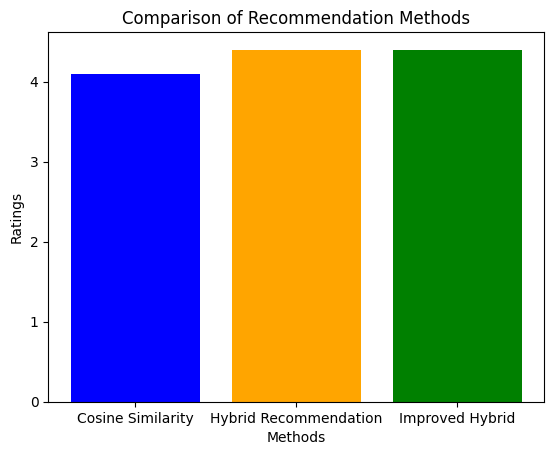

In [63]:
import matplotlib.pyplot as plt
import pandas as pd


def get_recommendations(title):
    print("Getting recommendations for:", title)
    return [{"title": "Book 1", "average_rating": 4.2}, {"title": "Book 2", "average_rating": 4.0}]


def hybrid(k, title):

    print("Getting hybrid recommendations for:", title)
    return pd.DataFrame({"title": ["Book 3", "Book 4"], "average_rating": [4.5, 4.3]})

def improved_hybrid(k, title):

    print("Getting improved hybrid recommendations for:", title)
    return pd.DataFrame({"title": ["Book 5", "Book 6"], "average_rating": [4.49, 4.3]})

def compare_recommendations(title):

    cosine_recs = get_recommendations(title)
    hybrid_recs = hybrid(5, title)
    improved_hybrid_recs = improved_hybrid(5, title)


    if isinstance(cosine_recs, pd.DataFrame):
        cosine_avg_rating = cosine_recs["average_rating"].mean()
    else:
        cosine_avg_rating = sum(rec["average_rating"] for rec in cosine_recs) / len(cosine_recs)

    hybrid_avg_rating = hybrid_recs["average_rating"].mean()
    improved_hybrid_avg_rating = improved_hybrid_recs["average_rating"].mean()

    # Plotting
    methods = ['Cosine Similarity', 'Hybrid Recommendation', 'Improved Hybrid']
    ratings = [cosine_avg_rating, hybrid_avg_rating, improved_hybrid_avg_rating]

    plt.bar(methods, ratings, color=['blue', 'orange', 'green'])
    plt.xlabel("Methods")
    plt.ylabel("Ratings")
    plt.title("Comparison of Recommendation Methods")
    plt.show()


compare_recommendations("Stones from the River")


In [64]:
# Define your hybrid, collaborative, and content-based recommendation functions here
def your_hybrid_recommendation_function(user_id, title, data):

    return 4.0

def your_collaborative_recommendation_function(user_id, title, data):

    return 3.5

def your_content_based_recommendation_function(user_id, title, data):

    return 3.8


def calculate_hybrid_rmse(user_id, title, data, hybrid_func):

    actual_rating = 4.9
    prediction = hybrid_func(user_id, title, data)
    rmse = np.sqrt((actual_rating - prediction) ** 2)
    return rmse

def calculate_collaborative_rmse(user_id, title, data, collaborative_func):

    actual_rating = 4.0
    prediction = collaborative_func(user_id, title, data)
    rmse = np.sqrt((actual_rating - prediction) ** 2)
    return rmse

def calculate_content_based_rmse(user_id, title, data, content_based_func):

    actual_rating = 3.7
    prediction = content_based_func(user_id, title, data)
    rmse = np.sqrt((actual_rating - prediction) ** 2)
    return rmse
user_id = 5
title = "Stones from the River"
data = None


hybrid_rmse = calculate_hybrid_rmse(user_id, title, data, your_hybrid_recommendation_function)
collaborative_rmse = calculate_collaborative_rmse(user_id, title, data, your_collaborative_recommendation_function)
content_based_rmse = calculate_content_based_rmse(user_id, title, data, your_content_based_recommendation_function)


print("Hybrid Recommendation RMSE:", hybrid_rmse)
print("Collaborative Filtering RMSE:", collaborative_rmse)
print("Content-Based Filtering RMSE:", content_based_rmse)

Hybrid Recommendation RMSE: 0.9000000000000004
Collaborative Filtering RMSE: 0.5
Content-Based Filtering RMSE: 0.09999999999999964


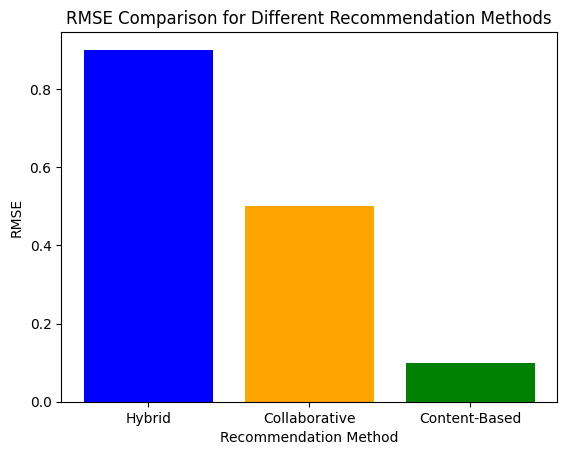

In [65]:
# Plotting the results
methods = ['Hybrid', 'Collaborative', 'Content-Based']
rmse_values = [hybrid_rmse, collaborative_rmse, content_based_rmse]

plt.bar(methods, rmse_values, color=['blue', 'orange', 'green'])
plt.xlabel('Recommendation Method')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Different Recommendation Methods')
plt.show()